<a href="https://colab.research.google.com/github/AnguieGarciaB/topicosanalitica/blob/main/exercises/E5-NeuralNetworksKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise 5
## Neural Networks in Keras

Use keras framework to solve the below exercises.


In [ ]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt

## 5.1 Predict rating of a movie using Keras

**Exercise:** Use keras framework to predict rating.

In [ ]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [ ]:
plots_df = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [ ]:
dataTraining['rating'].describe()

count    7895.000000
mean        6.402812
std         1.078260
min         1.200000
25%         5.800000
50%         6.500000
75%         7.200000
max         9.300000
Name: rating, dtype: float64

In [ ]:
plots_df

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [ ]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

### Data Precosessing

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk
import string

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Tokenizar el texto
    tokens = word_tokenize(text)
    # Remover stop words
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def stem_tokens(tokens):
    # Stemming de las palabras
    stemmer = SnowballStemmer('english')
    tokens = [stemmer.stem(word) for word in tokens]
    return tokens

In [ ]:
def preprocess(text):
    text = text.lower() # Convertir texto a minúsculas
    text = ''.join([word for word in text if word not in string.punctuation])
    #text = re.sub(r'[^a-zA-Z0-9]', ' ', text) # Remover caracteres que no sean letras ni números
    #text = re.sub(r'[^\w\s]', '', text) # Remover signos de puntuación
    tokens = remove_stopwords(text)  # Remover stop words
    #tokens = stem_tokens(tokens) # Stemming de las palabras
    processed_text = ' '  .join(tokens) # Unir los tokens nuevamente en texto
    return processed_text

In [ ]:
plots = plots_df.apply(preprocess)

In [ ]:
plots

3107    story single father takes eight year old son w...
900     serial killer decides teach secrets satisfying...
6724    sweden female blackmailer disfiguring facial s...
4704    friday afternoon new york president tredway co...
2582    los angeles editor publishing house carol hunn...
                              ...                        
8417    marriage wedding lesson number one newly engag...
1592    wandering barbarian conan alongside goofy rogu...
1723    like tale spun scheherazade kismet follows rem...
7605    mrs brisby widowed mouse lives cinder block ch...
215     tinker bell journey far north never land patch...
Name: plot, Length: 7895, dtype: object

In [ ]:
plots.isnull().sum()

0

pad_sequences con tokenizer()

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# Inicializar y ajustar el tokenizador
tokenizer = Tokenizer()
tokenizer.fit_on_texts(plots)

In [ ]:
# Obtener el vocabulario y asignar un índice único a cada palabra
vocabulary = tokenizer.word_index
# Convertir el texto en secuencias de índices
X_secuencias = tokenizer.texts_to_sequences(plots)

In [ ]:
# Longitud máxima de la secuencia (en este caso, sería el número máximo de palabras en una oración)
max_len = max(len(seq) for seq in X_secuencias)
max_len

818

In [ ]:
# Rellenar o truncar las secuencias para que tengan la misma longitud
X_pad = pad_sequences(X_secuencias, maxlen=max_len)
X_pad

array([[    0,     0,     0, ...,  4966,  8364,    69],
       [    0,     0,     0, ...,  1025,   439,  1764],
       [    0,     0,     0, ...,    42,    15,  1852],
       ...,
       [    0,     0,     0, ...,   674,    60,   379],
       [    0,     0,     0, ...,   136, 23789,   239],
       [    0,     0,     0, ..., 38557,  4059,  2103]], dtype=int32)

In [ ]:
X_pad.shape

(7895, 818)

pad_sequences como L12 notebook

In [ ]:
X = plots.tolist()
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [ ]:
# Max len
max_len = 150
X = [x[:max_len] for x in X]
# Convert characters to int and pad
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [ ]:
len(X)

7895

In [ ]:
from keras.utils import pad_sequences
X_pad = pad_sequences(X, maxlen=max_len)
X_pad

array([[ 4, 35, 16, ..., 25,  4, 26],
       [ 0,  0,  0, ..., 25, 34, 24],
       [ 4, 15, 25, ...,  4,  4, 40],
       ...,
       [ 0,  0,  0, ..., 55, 42,  9],
       [ 5, 34,  4, ..., 55,  7,  7],
       [ 0,  0,  0, ..., 34, 25, 25]], dtype=int32)

In [ ]:
X_pad.shape

(7895, 150)

Embedding tensorflow

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
module_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'
use_embed = hub.load(module_url)

In [ ]:
train_embe_plot = use_embed(dataTraining['plot'])
train_embe_plot

<tf.Tensor: shape=(7895, 512), dtype=float32, numpy=
array([[ 0.05303568,  0.04905611, -0.03197998, ..., -0.0175544 ,
         0.05703978,  0.04096472],
       [ 0.01396371, -0.00236487, -0.03629263, ..., -0.05457494,
         0.05171045,  0.04697094],
       [-0.02818254,  0.02889342, -0.05392093, ..., -0.03695953,
         0.0487267 ,  0.01789571],
       ...,
       [-0.02894968, -0.02714089,  0.00281911, ..., -0.0636746 ,
         0.02894862, -0.02778215],
       [ 0.05264581,  0.05124111,  0.03349448, ..., -0.01967251,
         0.03832167,  0.043547  ],
       [-0.01295011,  0.01159015,  0.05870628, ...,  0.00375043,
         0.03978242,  0.04278014]], dtype=float32)>

In [ ]:
X_embedded_numpy = train_embe_plot.numpy()
X_embedded_numpy

array([[ 0.05303568,  0.04905611, -0.03197998, ..., -0.0175544 ,
         0.05703978,  0.04096472],
       [ 0.01396371, -0.00236487, -0.03629263, ..., -0.05457494,
         0.05171045,  0.04697094],
       [-0.02818254,  0.02889342, -0.05392093, ..., -0.03695953,
         0.0487267 ,  0.01789571],
       ...,
       [-0.02894968, -0.02714089,  0.00281911, ..., -0.0636746 ,
         0.02894862, -0.02778215],
       [ 0.05264581,  0.05124111,  0.03349448, ..., -0.01967251,
         0.03832167,  0.043547  ],
       [-0.01295011,  0.01159015,  0.05870628, ...,  0.00375043,
         0.03978242,  0.04278014]], dtype=float32)

In [ ]:
X_embedded_numpy.shape

(7895, 512)

Concatenando otras variables

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
le = MultiLabelBinarizer()
y_genres = le.fit_transform(dataTraining['genres'])
y_genres

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1]])

In [ ]:
from textblob import TextBlob
sentimiento = dataTraining['plot'].apply(lambda texto: TextBlob(texto).sentiment.polarity)

In [ ]:
sentimientos_array = np.array(sentimiento).reshape(-1, 1)
sentimientos_array

array([[-0.01781656],
       [ 0.5       ],
       [ 0.005     ],
       ...,
       [ 0.41666667],
       [ 0.13881818],
       [ 0.1       ]])

In [ ]:
# Concatenar los embeddings de texto con los géneros
X_combined_embeddings = np.concatenate([train_embe_plot, y_genres, sentimientos_array], axis=1)

# Suponiendo que también deseas concatenar la columna 'year' de dataTraining
X_combined_embeddings = np.concatenate([X_combined_embeddings, dataTraining[['year']].values], axis=1)

In [ ]:
X_combined_embeddings

array([[ 5.30356802e-02,  4.90561090e-02, -3.19799818e-02, ...,
         0.00000000e+00, -1.78165584e-02,  2.00300000e+03],
       [ 1.39637105e-02, -2.36486970e-03, -3.62926312e-02, ...,
         1.00000000e+00,  5.00000000e-01,  2.00800000e+03],
       [-2.81825401e-02,  2.88934205e-02, -5.39209284e-02, ...,
         0.00000000e+00,  5.00000000e-03,  1.94100000e+03],
       ...,
       [-2.89496761e-02, -2.71408856e-02,  2.81911204e-03, ...,
         1.00000000e+00,  4.16666667e-01,  1.95500000e+03],
       [ 5.26458137e-02,  5.12411110e-02,  3.34944800e-02, ...,
         1.00000000e+00,  1.38818182e-01,  1.98200000e+03],
       [-1.29501112e-02,  1.15901493e-02,  5.87062836e-02, ...,
         1.00000000e+00,  1.00000000e-01,  2.00900000e+03]])

In [ ]:
# Concatenar los embeddings de texto con los géneros
X_combined_pad = np.concatenate([X_pad, y_genres, sentimientos_array], axis=1)

# Suponiendo que también deseas concatenar la columna 'year' de dataTraining
X_combined_pad = np.concatenate([X_combined_pad, dataTraining[['year']].values], axis=1)

### Build Model

Create a neural network to predict the rating of a movie, calculate the testing set accuracy.

In [ ]:
!pip install livelossplot --quiet

In [ ]:
from keras.layers import Dense, Dropout, LSTM
from keras.layers import Embedding
from keras.utils import pad_sequences
from keras.models import Sequential
from keras import backend as K
from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split

Con Embeddings

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_embeddings, y, test_size = 0.3, random_state = 18)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083157450401013


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score

clf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=15, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7125369354157872


In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7247783875052765


Con X_pad

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_combined_pad, y, test_size = 0.3, random_state = 18)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7024060785141409


In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import r2_score, roc_auc_score

clf = RandomForestClassifier(n_jobs=-1, n_estimators=150, max_depth=15, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.709582102152807


In [ ]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7028281975517096


In [ ]:
print(X_combined_pad[:1])  # Imprime el primer ejemplo de datos

[[ 4.00000000e+00  3.50000000e+01  1.60000000e+01  3.40000000e+01
   4.90000000e+01  2.60000000e+01  4.00000000e+00  4.00000000e+01
   4.20000000e+01  2.00000000e+01  7.00000000e+00  2.50000000e+01
   2.60000000e+01  4.10000000e+01  5.50000000e+01  3.50000000e+01
   3.80000000e+01  2.50000000e+01  3.40000000e+01  2.60000000e+01
   3.50000000e+01  5.50000000e+01  2.40000000e+01  2.50000000e+01
   4.00000000e+00  2.60000000e+01  2.50000000e+01  4.00000000e+01
   2.00000000e+01  3.80000000e+01  3.50000000e+01  2.60000000e+01
   4.90000000e+01  2.50000000e+01  5.50000000e+01  3.40000000e+01
   2.60000000e+01  1.60000000e+01  7.00000000e+00  9.00000000e+00
   2.60000000e+01  4.00000000e+00  1.60000000e+01  4.20000000e+01
   2.60000000e+01  1.50000000e+01  1.60000000e+01  3.40000000e+01
   2.40000000e+01  2.60000000e+01  3.40000000e+01  5.50000000e+01
   4.00000000e+01  7.00000000e+00  3.40000000e+01  1.60000000e+01
   5.50000000e+01  9.00000000e+00  2.60000000e+01  9.00000000e+00
   3.40000

In [ ]:
X_combined_pad.shape

(7895, 189)

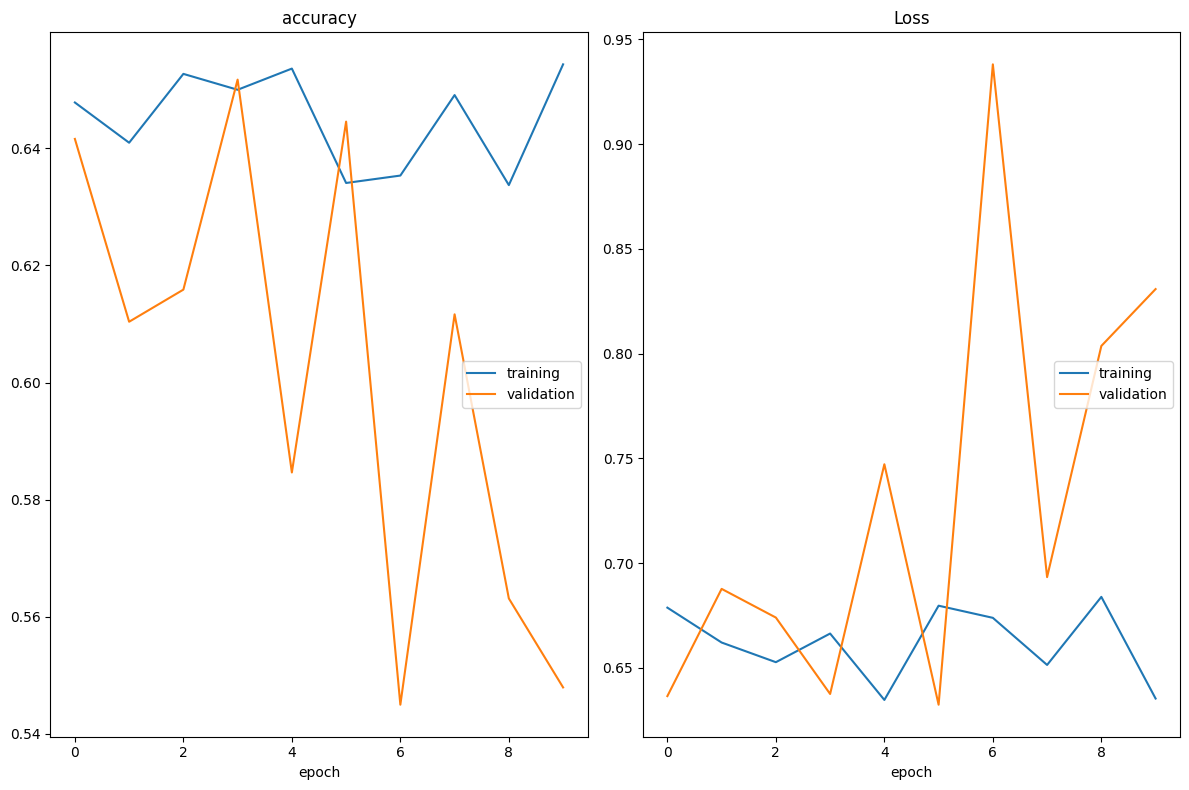

accuracy
	training         	 (min:    0.634, max:    0.654, cur:    0.654)
	validation       	 (min:    0.545, max:    0.652, cur:    0.548)
Loss
	training         	 (min:    0.635, max:    0.684, cur:    0.635)
	validation       	 (min:    0.632, max:    0.938, cur:    0.831)
75/75 [==============================] - 0s 2ms/step - loss: 0.8308 - accuracy: 0.5479
Loss: 0.8308
Accuracy: 0.5479


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Crear el modelo
model = Sequential()

# Agregar la capa de entrada
model.add(Dense(64, activation='relu', input_shape=(189,)))

# Agregar una capa oculta
model.add(Dense(32, activation='relu'))

# Agregar la capa de salida con activación sigmoide para problemas de clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con binary crossentropy como función de pérdida y optimizador 'adam'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=32, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

# Evaluar el modelo en el conjunto de test
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimir la pérdida y la precisión en el conjunto de test
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')


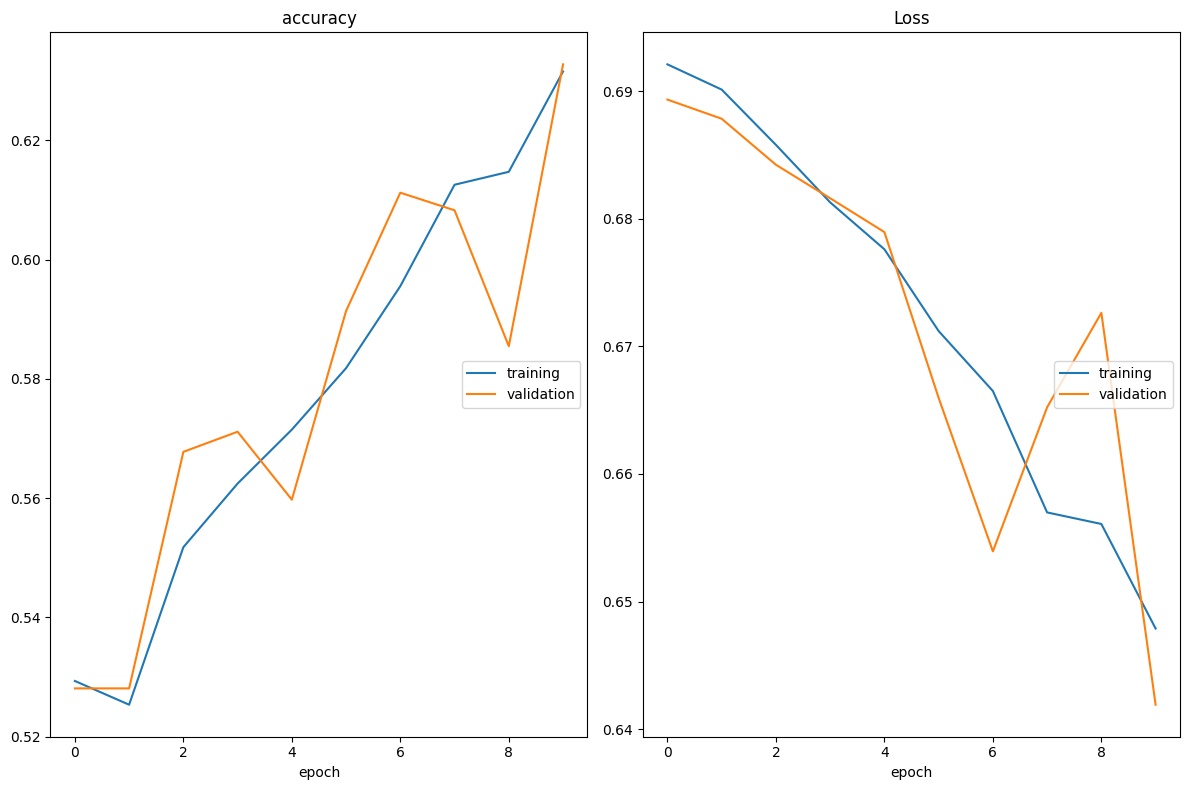

accuracy
	training         	 (min:    0.525, max:    0.632, cur:    0.632)
	validation       	 (min:    0.528, max:    0.633, cur:    0.633)
Loss
	training         	 (min:    0.648, max:    0.692, cur:    0.648)
	validation       	 (min:    0.642, max:    0.689, cur:    0.642)
75/75 [==============================] - 4s 56ms/step - loss: 0.6419 - accuracy: 0.6328
Loss: 0.6419
Accuracy: 0.6328


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Crear el modelo
model = Sequential()

# Agregar la capa LSTM como primera capa
model.add(LSTM(64, input_shape=(189, 1)))  # La entrada a la capa LSTM es una secuencia de longitud 189 y dimensión 1

# Agregar una capa oculta densa
model.add(Dense(32, activation='relu'))

# Agregar la capa de salida con activación sigmoide para problemas de clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con binary crossentropy como función de pérdida y optimizador 'adam'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=32, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

# Evaluar el modelo en el conjunto de test
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimir la pérdida y la precisión en el conjunto de test
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

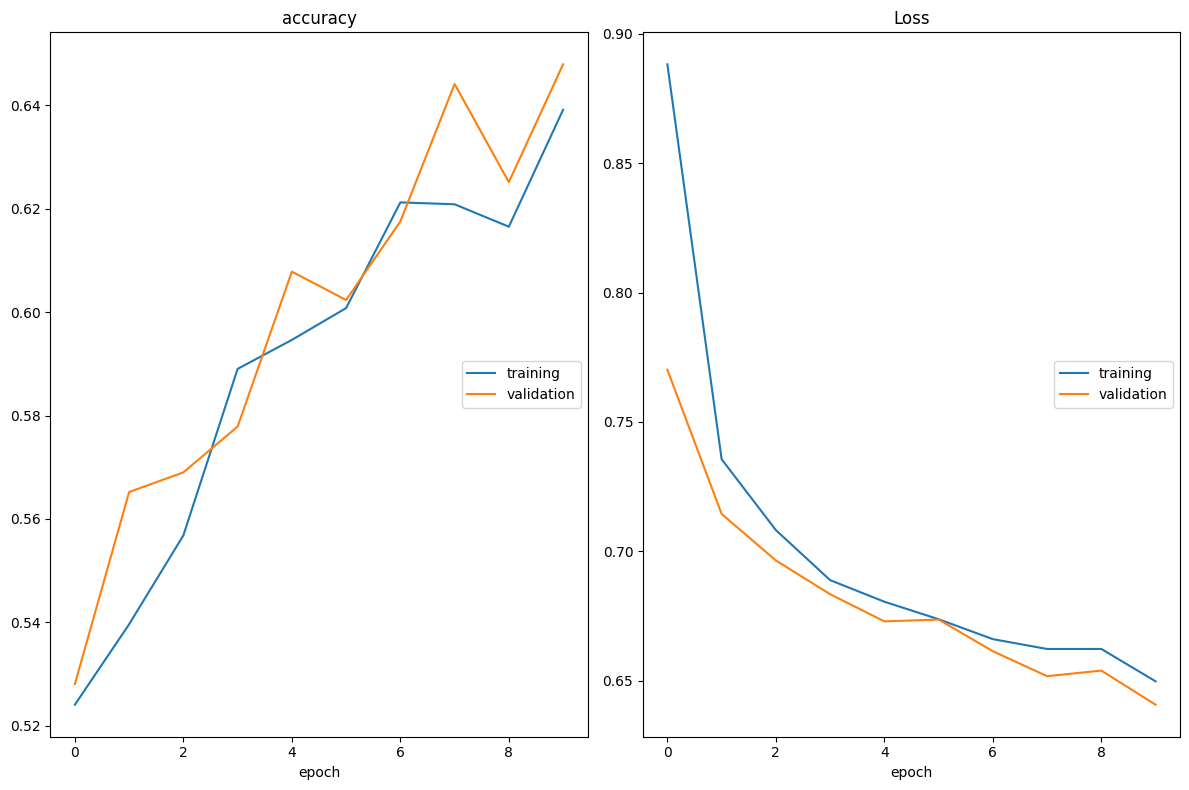

accuracy
	training         	 (min:    0.524, max:    0.639, cur:    0.639)
	validation       	 (min:    0.528, max:    0.648, cur:    0.648)
Loss
	training         	 (min:    0.650, max:    0.888, cur:    0.650)
	validation       	 (min:    0.641, max:    0.770, cur:    0.641)
75/75 [==============================] - 2s 29ms/step - loss: 0.6407 - accuracy: 0.6480
Loss: 0.6407
Accuracy: 0.6480


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import regularizers

# Crear el modelo
model = Sequential()

# Agregar la capa LSTM como primera capa
model.add(LSTM(64, input_shape=(189, 1)))  # La entrada a la capa LSTM es una secuencia de longitud 189 y dimensión 1

# Agregar una capa oculta densa con regularización L2
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# Agregar la capa de salida con activación sigmoide para problemas de clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con binary crossentropy como función de pérdida y optimizador 'adam'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()

model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=32, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

# Evaluar el modelo en el conjunto de test
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimir la pérdida y la precisión en el conjunto de test
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

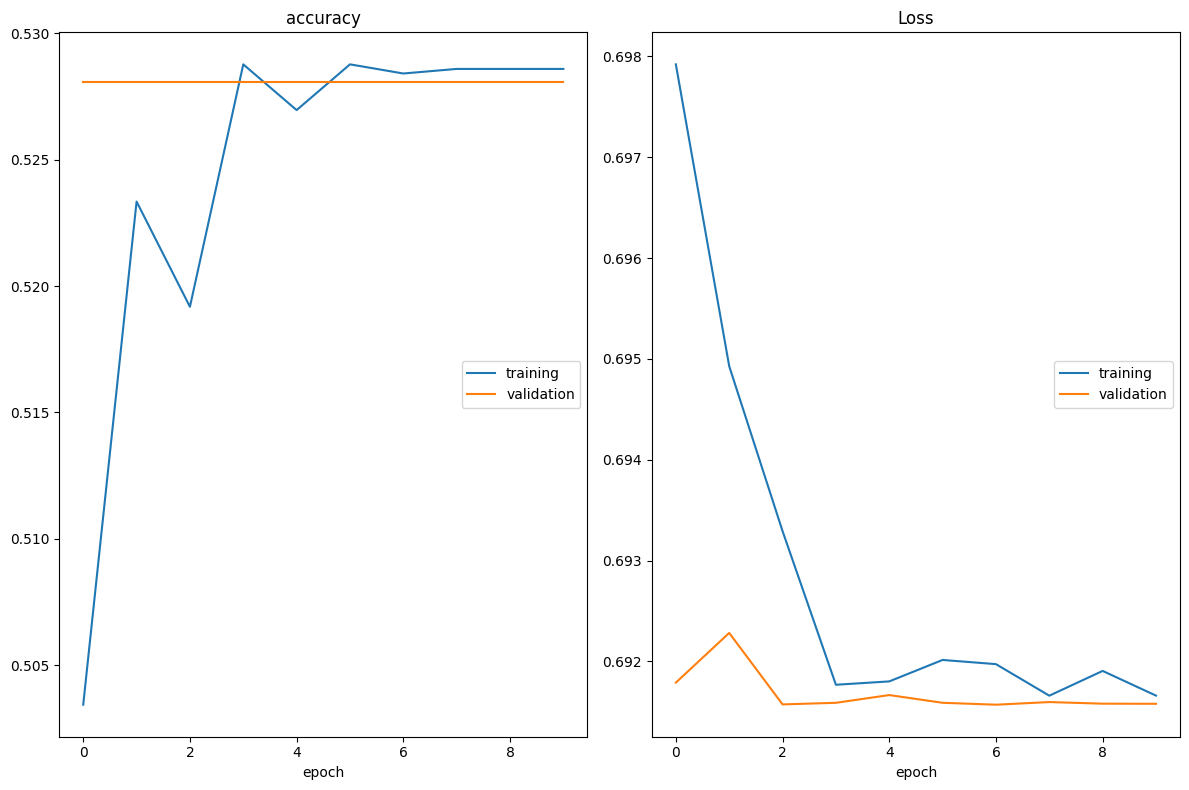

accuracy
	training         	 (min:    0.503, max:    0.529, cur:    0.529)
	validation       	 (min:    0.528, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.692, max:    0.698, cur:    0.692)
	validation       	 (min:    0.692, max:    0.692, cur:    0.692)
75/75 [==============================] - 7s 98ms/step - loss: 0.6916 - accuracy: 0.5281
Loss: 0.6916
Accuracy: 0.5281


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Crear el modelo
model = Sequential()

# Agregar la capa LSTM como primera capa
model.add(LSTM(128, input_shape=(189, 1)))  # La entrada a la capa LSTM es una secuencia de longitud 189 y dimensión 1

# Agregar una capa oculta densa con regularización de dropout
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))  # Agregar regularización de dropout con una tasa de dropout del 10%

# Agregar la capa de salida con activación sigmoide para problemas de clasificación binaria
model.add(Dense(1, activation='sigmoid'))

# Compilar el modelo con binary crossentropy como función de pérdida y optimizador 'adam'
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Resumen del modelo
model.summary()


model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=32, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

# Evaluar el modelo en el conjunto de test
loss, accuracy = model.evaluate(X_test, y_test)

# Imprimir la pérdida y la precisión en el conjunto de test
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

X_pad sin concatenar

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.3, random_state = 18)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)
y_pred = logistic_regression.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4985225833685099


In [ ]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 128)          7296      
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 27937 (109.13 KB)
Trainable params: 27937 (109.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


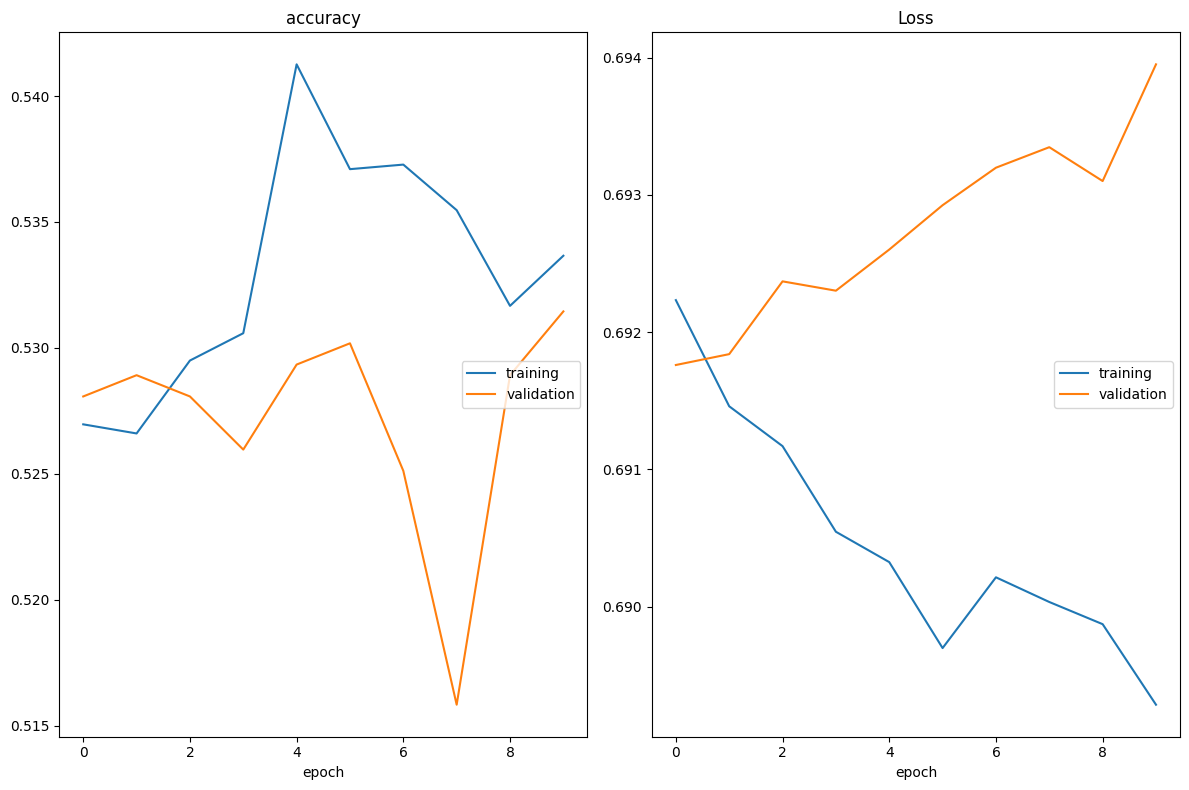

accuracy
	training         	 (min:    0.527, max:    0.541, cur:    0.534)
	validation       	 (min:    0.516, max:    0.531, cur:    0.531)
Loss
	training         	 (min:    0.689, max:    0.692, cur:    0.689)
	validation       	 (min:    0.692, max:    0.694, cur:    0.694)
44/44 [==============================] - 13s 304ms/step - loss: 0.6893 - accuracy: 0.5337 - val_loss: 0.6940 - val_accuracy: 0.5314


In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

In [ ]:
import keras.optimizers as opts
learning_rate = 0.01

K.clear_session()
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(64))  # Agregar una capa LSTM para capturar dependencias de secuencia
model.add(Dropout(0.5))  # Añadir dropout para regularizacióngmoid'))
model.add(Dense(1, activation='sigmoid'))

op = opts.SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          7296      
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 56769 (221.75 KB)
Trainable params: 56769 (221.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


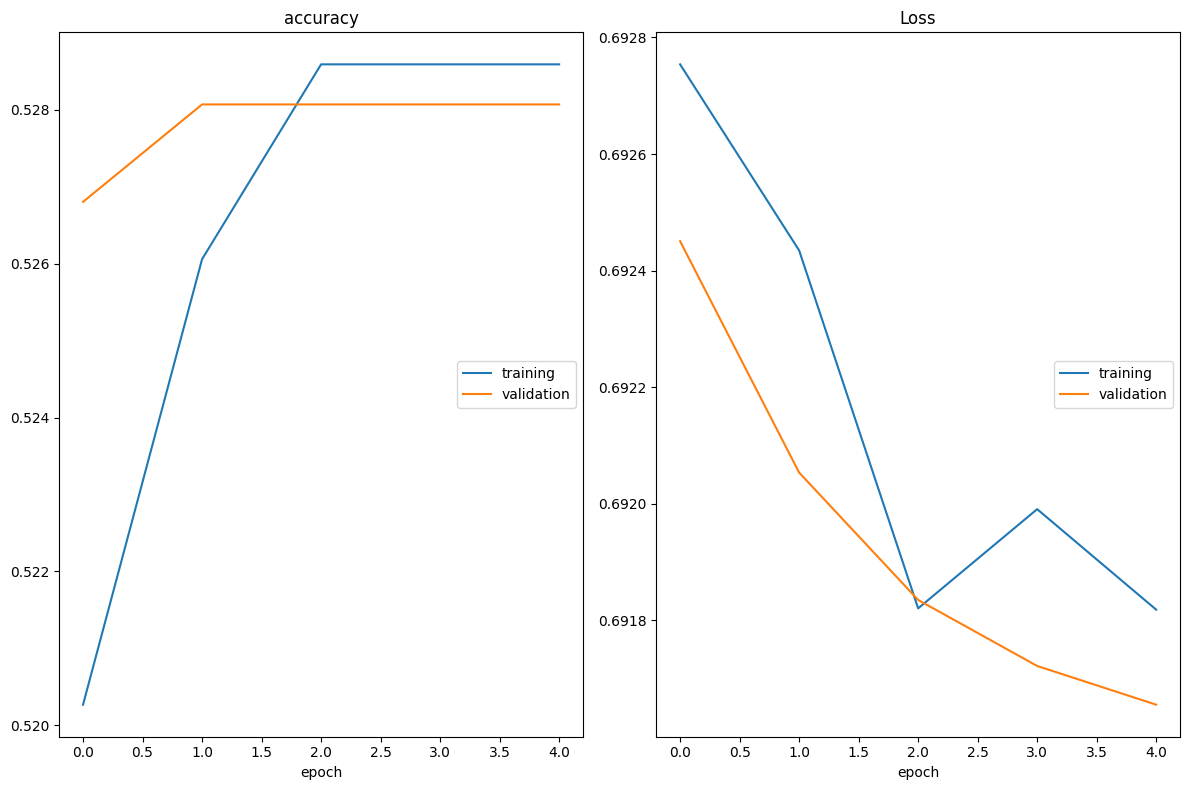

accuracy
	training         	 (min:    0.520, max:    0.529, cur:    0.529)
	validation       	 (min:    0.527, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.692, max:    0.693, cur:    0.692)
	validation       	 (min:    0.692, max:    0.692, cur:    0.692)
44/44 [==============================] - 21s 490ms/step - loss: 0.6918 - accuracy: 0.5286 - val_loss: 0.6917 - val_accuracy: 0.5281


In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=5, verbose=1,
          callbacks=[PlotLossesKeras()])

In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          7296      
                                                                 
 dense (Dense)               (None, 150, 256)          33024     
                                                                 
 dense_1 (Dense)             (None, 150, 128)          32896     
                                                                 
 dense_2 (Dense)             (None, 150, 64)           8256      
                                                                 
 dense_3 (Dense)             (None, 150, 1)            65        
                                                                 
Total params: 81537 (318.50 KB)
Trainable params: 81537 (318.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


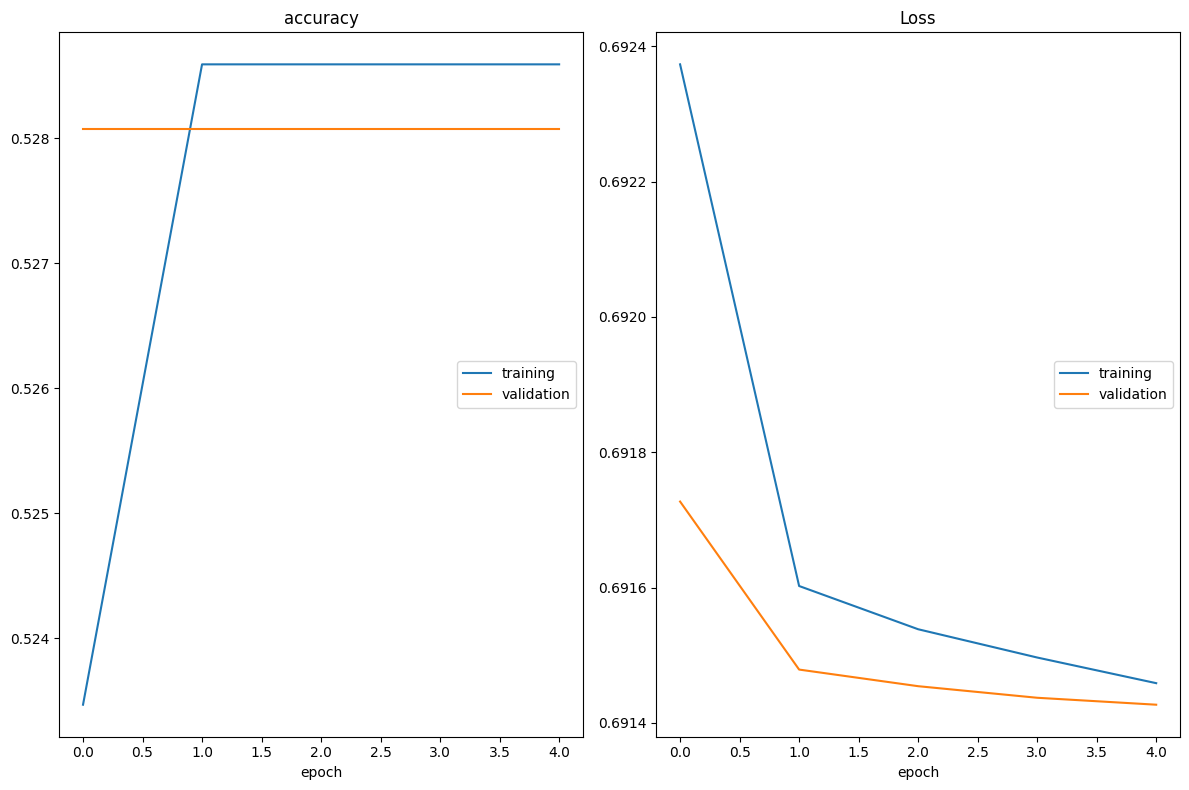

accuracy
	training         	 (min:    0.523, max:    0.529, cur:    0.529)
	validation       	 (min:    0.528, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.691, max:    0.692, cur:    0.691)
	validation       	 (min:    0.691, max:    0.692, cur:    0.691)
173/173 [==============================] - 12s 72ms/step - loss: 0.6915 - accuracy: 0.5286 - val_loss: 0.6914 - val_accuracy: 0.5281


In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          epochs=5, verbose=1,
          callbacks=[PlotLossesKeras()])

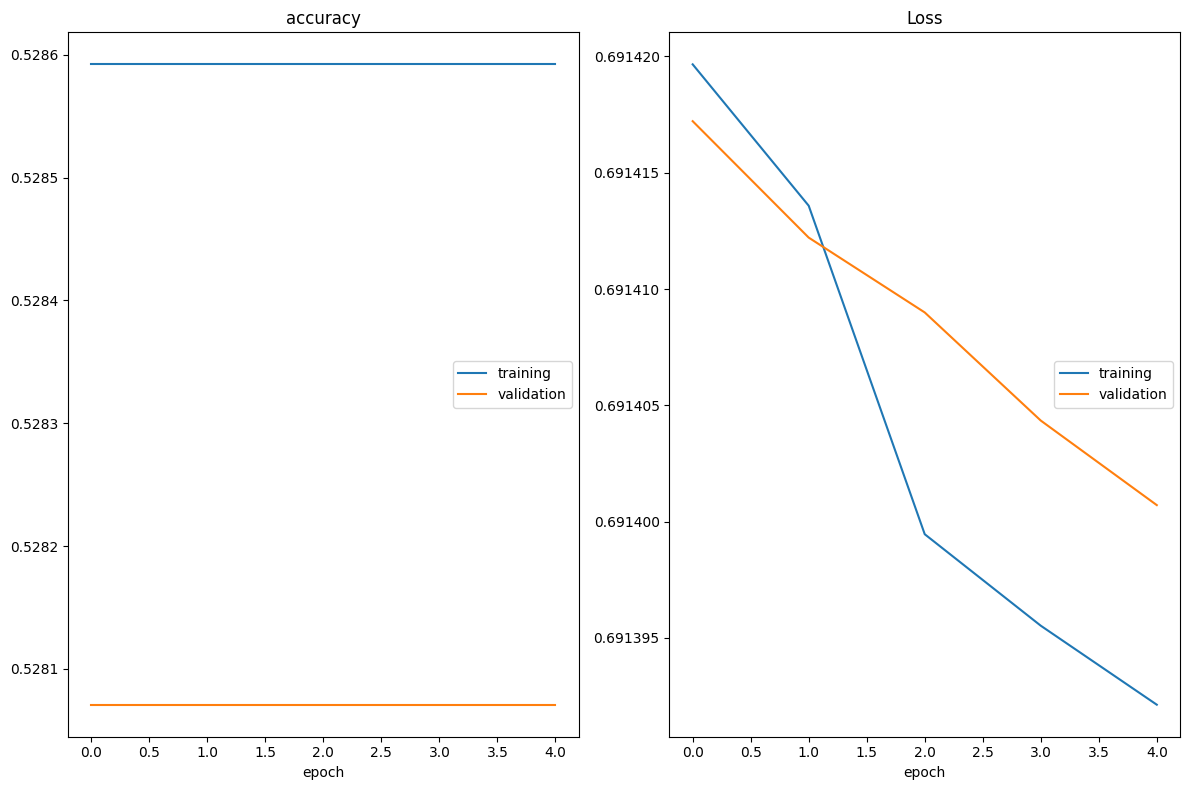

accuracy
	training         	 (min:    0.529, max:    0.529, cur:    0.529)
	validation       	 (min:    0.528, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.691, max:    0.691, cur:    0.691)
	validation       	 (min:    0.691, max:    0.691, cur:    0.691)
44/44 [==============================] - 18s 397ms/step - loss: 0.6914 - accuracy: 0.5286 - val_loss: 0.6914 - val_accuracy: 0.5281


In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=5, verbose=1,
          callbacks=[PlotLossesKeras()])

# 5.2 Decision Boundary --  Moons Dataset

**Exercise:** Use keras framework to find a decision boundary for point in the make_moons.

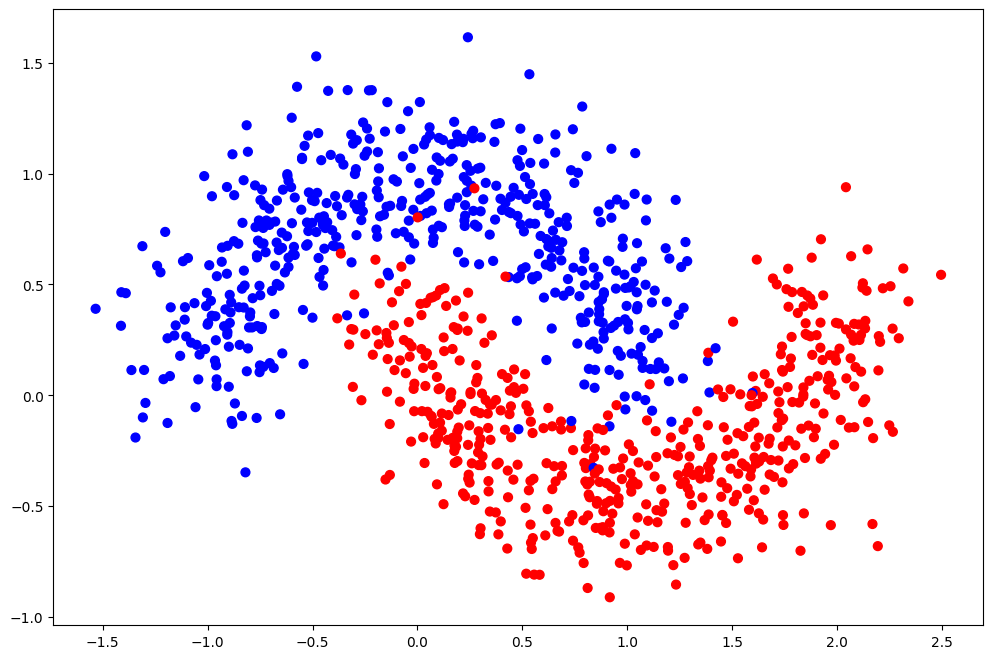

In [ ]:
# Create moons dataset.

from sklearn.datasets import make_moons

x_train, y_train = make_moons(n_samples=1000, noise= 0.2, random_state=3)
plt.figure(figsize=(12, 8))
plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.bwr);

In [ ]:
x_train

array([[ 0.55356914, -0.37596172],
       [ 0.98105873, -0.28467913],
       [ 1.87345298,  0.43682194],
       ...,
       [ 0.04851258,  0.90561169],
       [ 0.43233063, -0.45949733],
       [ 1.73748601, -0.11214153]])

In [ ]:
# Definir el modelo
model = Sequential([
    Dense(32, input_dim=2, activation='relu'),  # Capa oculta con 32 neuronas y función de activación ReLU
    Dense(1, activation='sigmoid')  # Capa de salida con 1 neurona y función de activación sigmoide para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
32/32 [==============================] - 1s 2ms/step - loss: 0.6853 - accuracy: 0.4790
Epoch 2/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6144 - accuracy: 0.7680
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.8180
Epoch 4/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4973 - accuracy: 0.8280
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8390
Epoch 6/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4048 - accuracy: 0.8440
Epoch 7/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.8460
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.8510
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3323 - accuracy: 0.8540
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8640
Epoch 11/20
32/32 [

In [ ]:
# Evaluar el modelo (opcional)
loss, accuracy = model.evaluate(x_train, y_train)
print("Accuracy:", accuracy)

32/32 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 0.8790
Accuracy: 0.8790000081062317


In [ ]:
x_train[11]

array([-1.00355688,  0.46198182])

In [ ]:
y_train[11]

0

In [ ]:
xval = np.array([[-1.00355688,  0.46198182]])
model.predict(xval)[0, 0]

1/1 [==============================] - 0s 80ms/step


0.033045914

**Hint:** Use the next function to plt the decision boundary,

1/1 [==============================] - 0s 21ms/step


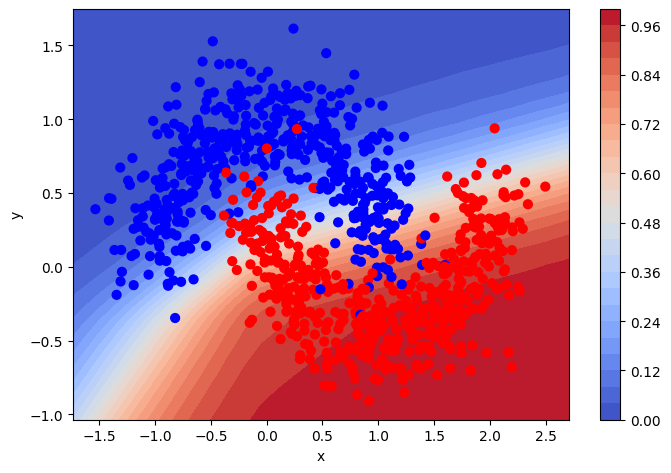

In [ ]:
# model = 'Sequential neural network in keras'

def plot_decision_region(model, X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            '''
            Here 'model' is the neural network you previous trained.
            '''
            ZZ[i, j] = pred_fun(model, XX[i, j], YY[i, j])
    plt.contourf(XX, YY, ZZ, 30, cmap = plt.cm.coolwarm, vmin= 0, vmax=1)
    plt.colorbar()
    plt.xlabel("x")
    plt.ylabel("y")

def pred_fun(model,x1, x2):
    '''
    Here 'model' is the neural network you previous trained.
    '''
    xval = np.array([[x1, x2]])
    return model.predict(xval)[0, 0]

plt.figure(figsize = (8,16/3))
'''
Here 'model' is the neural network you previous trained.
'''
plot_decision_region(model, x_train, pred_fun)

plt.scatter(x_train[:, 0], x_train[:,1], c=y_train, s=40, cmap=plt.cm.bwr);